In [1]:
from ensmallen_graph.datasets.linqs import Cora
from embiggen.embedders import TransE

Using TensorFlow backend.


In [2]:
cora = Cora()

In [3]:
model = TransE(cora, distance_metric="L2")

/Users/lucacappelletti/github/embiggen/embiggen/embedders/siamese.py:82: UserWarning: The graph contains disconnected nodes: these nodes will not be embedded in a semantically sensible way, but will only obtain a random node embedding vector which is from all other nodes.
  "The graph contains disconnected nodes: these nodes will "


In [12]:
cora

The undirected graph Cora has 4141 nodes There are 1 singleton nodes, and 54494 weighted edges, of which none are self-loops. The graph is sparse as it has a density of 0.00636 and has 2 connected components, where the component with most nodes has 4140 nodes and the component with the least nodes has a single node. The graph median node degree is 22, the mean node degree is 26.32, and the node degree mode is 24. The top 5 most central nodes are word_1177 (degree 1083), word_1263 (degree 980), word_507 (degree 676), word_1209 (degree 584) and word_19 (degree 560). The hash of the graph is 11ca413ad9c5be9b.

In [4]:
history = model.fit()

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [5]:
embedding = model.get_embedding_dataframe()

In [6]:
embedding.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,...,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,0.143051,-0.143859,0.142735,-0.142563,0.143958,0.144702,0.142851,-0.142237,0.144514,0.142797,...,-0.143933,0.142876,-0.141820,-0.144088,-0.142911,-0.144022,-0.143227,-0.144081,-0.144035,0.142491
std,0.267376,0.268943,0.266789,0.266531,0.269126,0.270449,0.267067,0.265862,0.270160,0.266905,...,0.269018,0.267052,0.265088,0.269367,0.267117,0.269244,0.267767,0.269355,0.269269,0.266335
min,-4.227953,-0.680735,-4.218711,-0.675243,-4.239963,-4.275783,-4.207852,-0.646415,-4.256114,-4.220743,...,-0.653934,-4.223004,-0.644558,-0.681709,-0.649397,-0.681425,-0.678056,-0.681669,-0.681485,-4.211792
25%,0.023511,-0.314226,0.023432,-0.311293,0.024471,0.023876,0.024191,-0.309116,0.024623,0.023448,...,-0.312976,0.023472,-0.308251,-0.314722,-0.310506,-0.314578,-0.312846,-0.314701,-0.314608,0.023373
50%,0.200431,-0.203395,0.199921,-0.201478,0.203530,0.202793,0.201899,-0.199162,0.204382,0.200021,...,-0.201656,0.200143,-0.198591,-0.203699,-0.200213,-0.203598,-0.202454,-0.203721,-0.203620,0.199518
75%,0.310847,-0.024455,0.310143,-0.024147,0.314439,0.314586,0.311966,-0.023299,0.315633,0.310274,...,-0.023751,0.310439,-0.023231,-0.024476,-0.023463,-0.024466,-0.024279,-0.024507,-0.024464,0.309637
max,0.650019,4.237064,0.648626,4.199510,0.681153,0.657335,0.676464,4.204378,0.683502,0.648899,...,4.253515,0.649252,4.192356,4.243709,4.223951,4.241840,4.218838,4.243508,4.242203,0.647548


In [7]:
from embiggen import GraphVisualization

visualizer = GraphVisualization(cora)

In [8]:
visualizer.fit_transform_nodes(embedding)

In [9]:
visualizer.fit_transform_edges(embedding, )

(<Figure size 1400x1400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc742cc1b10>)

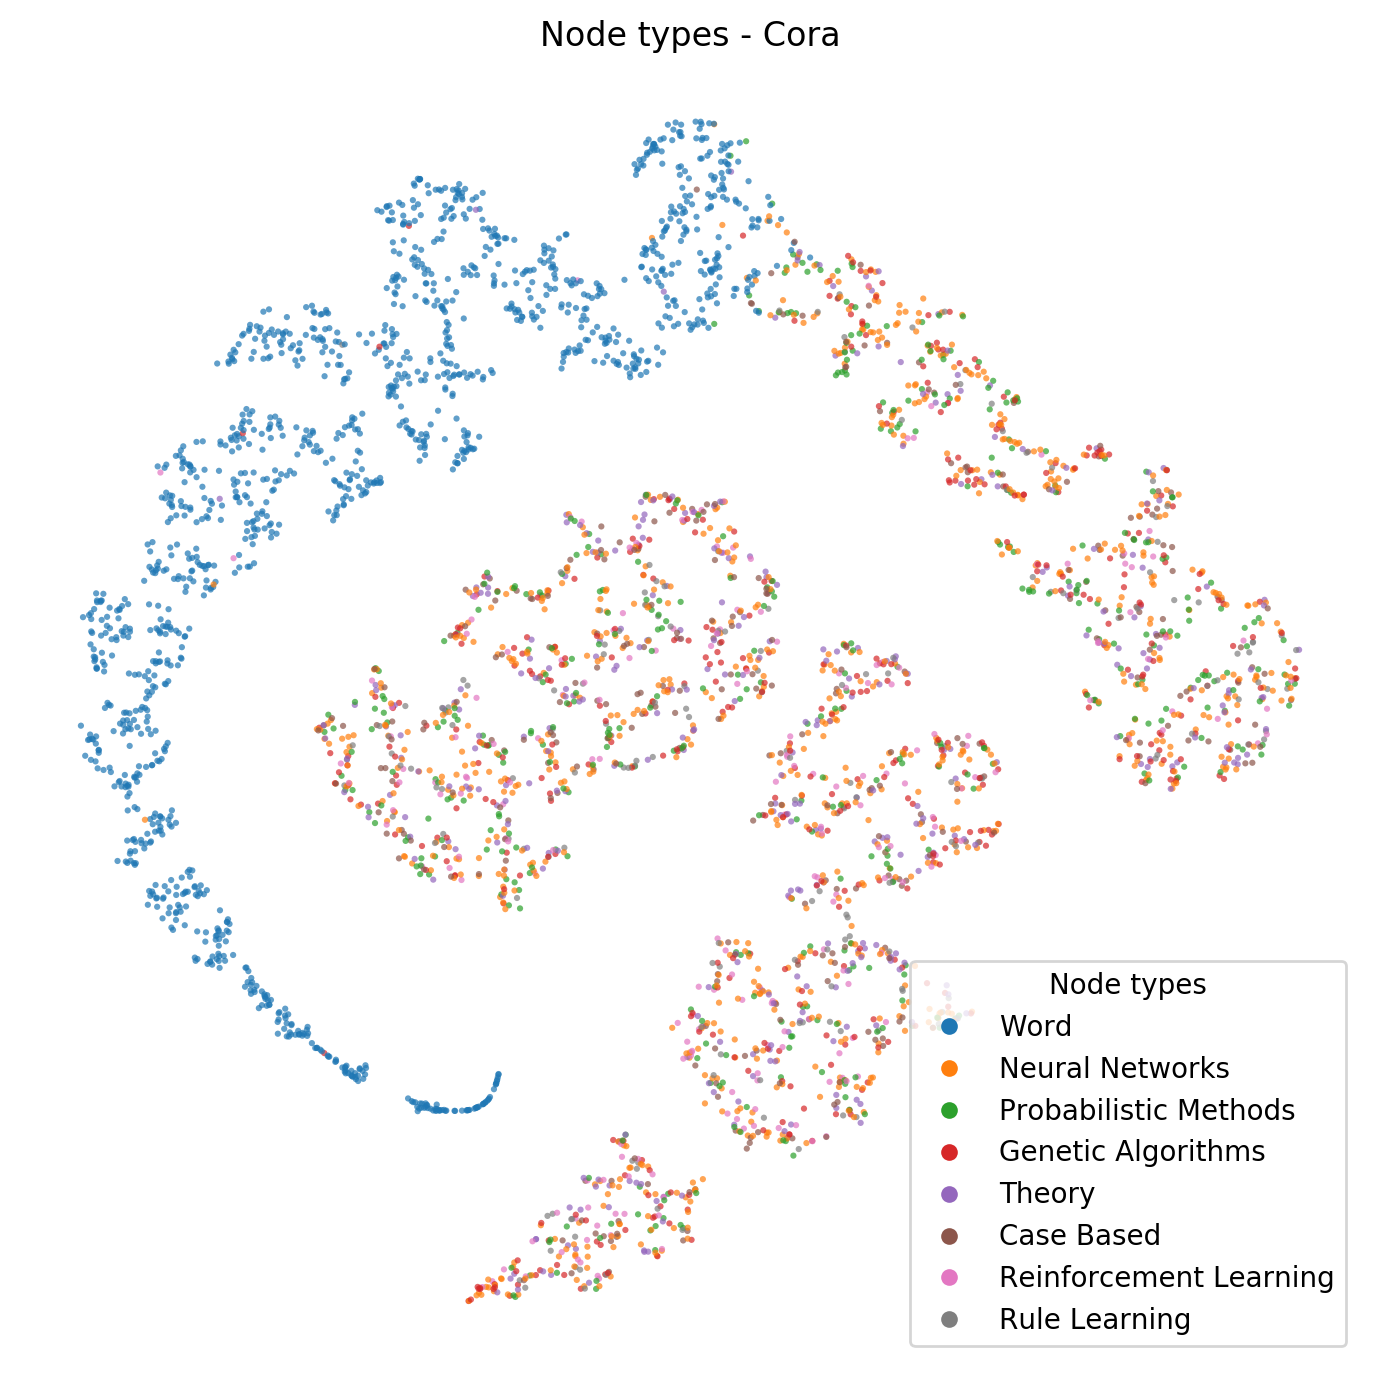

In [10]:
visualizer.plot_node_types()

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:509: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


(<Figure size 1400x1400 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6b020d3d0>)

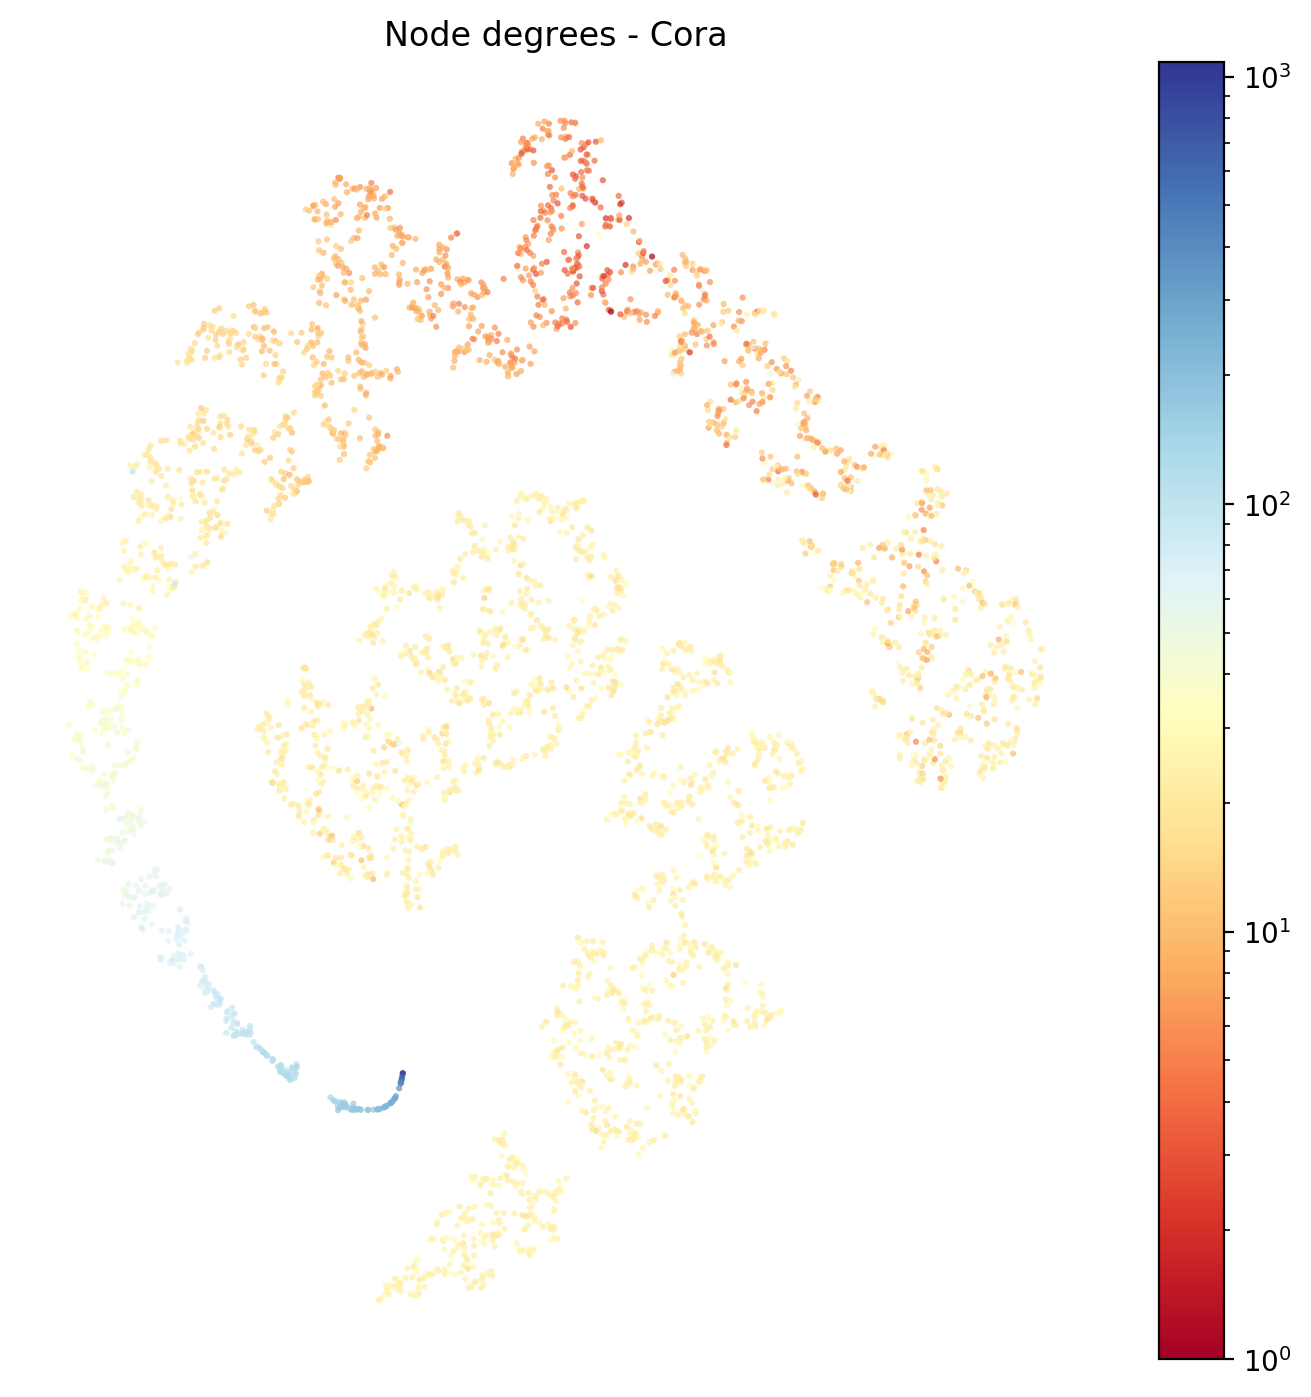

In [11]:
visualizer.plot_node_degrees()

(<Figure size 1400x1400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6a8393310>)

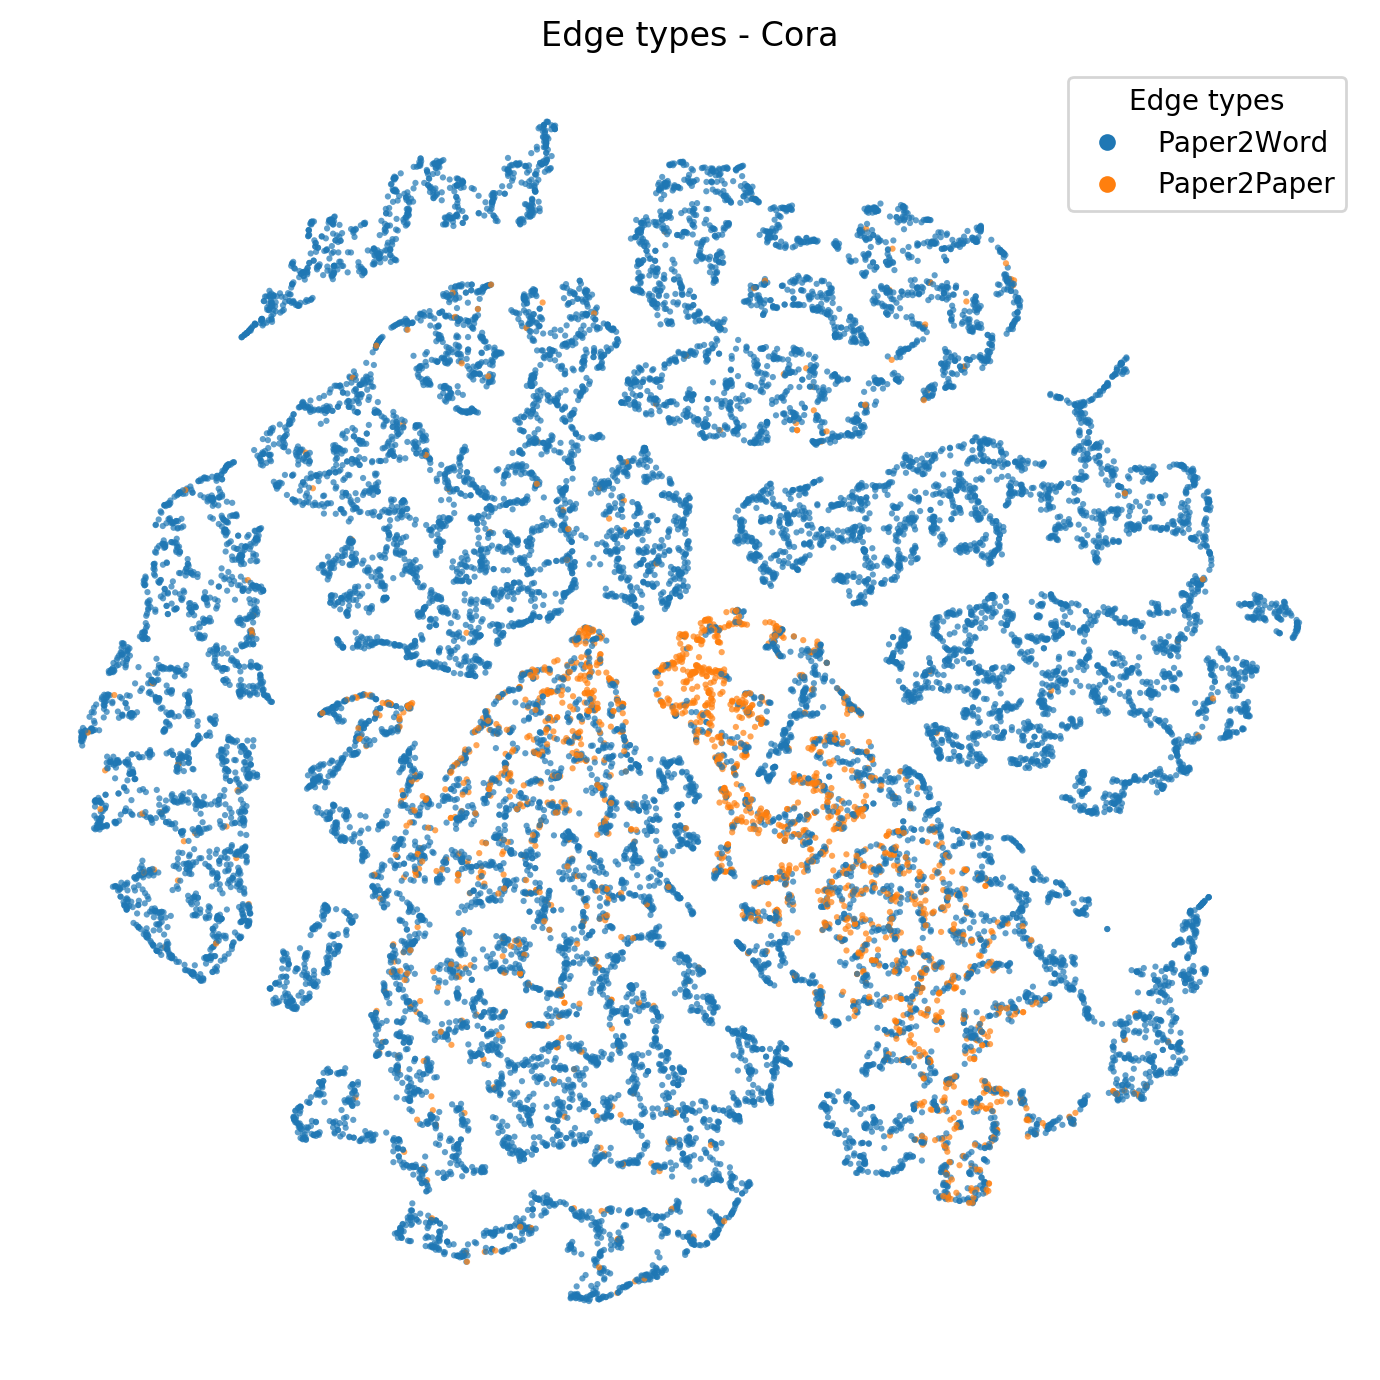

In [13]:
visualizer.plot_edge_types()